<a href="https://colab.research.google.com/github/AenimaLabs/CienciaDatos0067/blob/main/Evaluaci%C3%B3nFinalM4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Configuración básica de visualización
plt.style.use('default')
sns.set_palette("Set2")

In [3]:
# Cargar el dataset
ruta = '/content/drive/MyDrive/Evaluaciones_0067/olimpicos.csv'
df = pd.read_csv(ruta)

# Mostrar las primeras 5 filas
print("Primeras 5 filas del dataset:")
display(df)

print("\nDatos nulos")
print(df.isnull().sum())

# Información general del DataFrame
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())



Primeras 5 filas del dataset:


,Atleta,Edad,Altura_cm,Peso_kg,Deporte,Entrenamientos_Semanales,Medallas_Totales,Pais
0,Usain Bolt,34,195,94,Atletismo,6,8,Jamaica
1,Simone Biles,26,142,47,Gimnasia,10,7,EE.UU.
2,Michael Phelps,35,193,88,Natación,9,23,EE.UU.
3,Katie Ledecky,27,183,70,Natación,8,10,EE.UU.
4,Nadia Comaneci,45,160,50,Gimnasia,7,5,Rumania
5,Mo Farah,38,175,65,Atletismo,6,4,Reino Unido
6,Yelena Isinbayeva,40,174,65,Salto con pértiga,5,3,Rusia



Datos nulos
Atleta                      0
Edad                        0
Altura_cm                   0
Peso_kg                     0
Deporte                     0
Entrenamientos_Semanales    0
Medallas_Totales            0
Pais                        0
dtype: int64

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atleta                    7 non-null      object
 1   Edad                      7 non-null      int64 
 2   Altura_cm                 7 non-null      int64 
 3   Peso_kg                   7 non-null      int64 
 4   Deporte                   7 non-null      object
 5   Entrenamientos_Semanales  7 non-null      int64 
 6   Medallas_Totales          7 non-null      int64 
 7   Pais                      7 non-null      object
dtypes: int64(5), object(3)
memory usage: 580.0+ bytes
None

Estadís

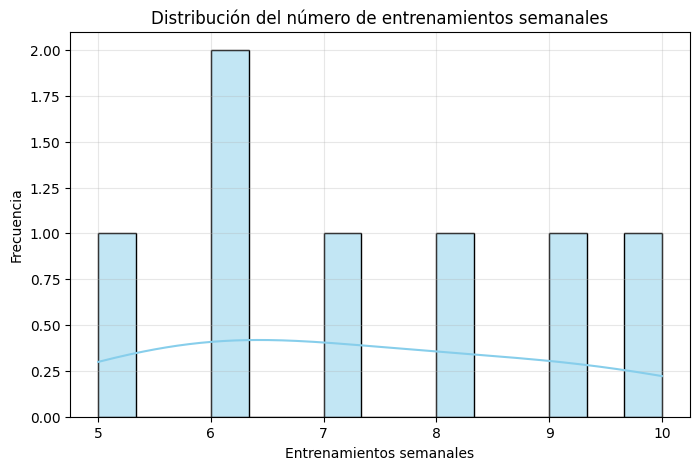

In [4]:
# Histograma del número de entrenamientos semanales
plt.figure(figsize=(8, 5))
sns.histplot(df['Entrenamientos_Semanales'], bins=15, kde=True, color='skyblue')
plt.title('Distribución del número de entrenamientos semanales')
plt.xlabel('Entrenamientos semanales')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

## Estadística descriptiva

In [5]:
# Determinar el tipo de variable de cada columna
print("Tipos de variables por columna:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: Categórica")
    elif df[col].dtype in ['int64']:
            print(f"{col}: Cuantitativa discreta")
    elif df[col].dtype in ['float64']:
        print(f"{col}: Cuantitativa continua")
    else:
        print(f"{col}: Otro tipo")



Tipos de variables por columna:
Atleta: Categórica
Edad: Cuantitativa discreta
Altura_cm: Cuantitativa discreta
Peso_kg: Cuantitativa discreta
Deporte: Categórica
Entrenamientos_Semanales: Cuantitativa discreta
Medallas_Totales: Cuantitativa discreta
Pais: Categórica



Medallas totales - Media: 8.57, Mediana: 7.0, Moda: 3
Desviación estándar de la altura: 18.72 cm


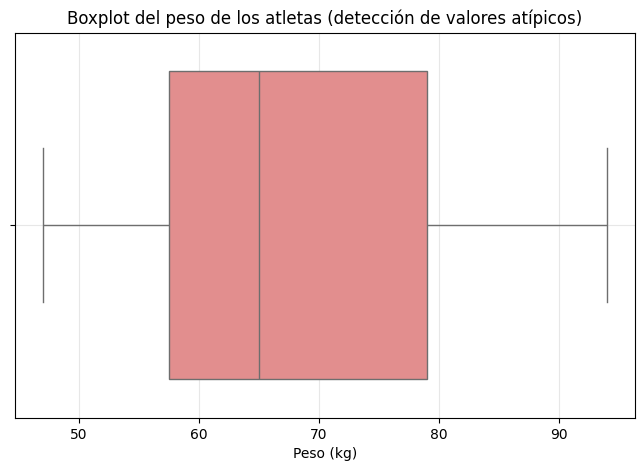

In [6]:
# Media, mediana y moda de medallas obtenidas
medallas = df['Medallas_Totales']

media = medallas.mean()
mediana = medallas.median()
moda = medallas.mode()[0] if not medallas.mode().empty else np.nan

print(f"\nMedallas totales - Media: {media:.2f}, Mediana: {mediana}, Moda: {moda}")

# Desviación estándar de la altura
desv_altura = df['Altura_cm'].std()
print(f"Desviación estándar de la altura: {desv_altura:.2f} cm")

# Boxplot para identificar valores atípicos en peso
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Peso_kg'], color='lightcoral')
plt.title('Boxplot del peso de los atletas (detección de valores atípicos)')
plt.xlabel('Peso (kg)')
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
df.columns

Index(['Atleta', 'Edad', 'Altura_cm', 'Peso_kg', 'Deporte',
       'Entrenamientos_Semanales', 'Medallas_Totales', 'Pais'],
      dtype='object')

Correlación de Pearson entre entrenamientos semanales y medallas totales: 0.570


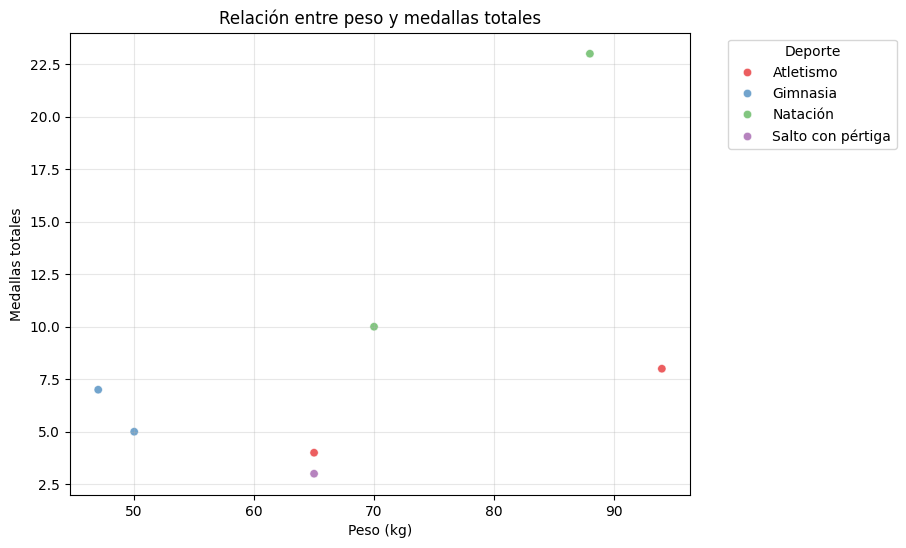


Interpretación: Existe una correlación positiva fuerte entre entrenamientos semanales y medallas totales.


In [8]:
# Correlación de Pearson entre entrenamientos semanales y medallas totales
corr_entren_medallas = df['Entrenamientos_Semanales'].corr(df['Medallas_Totales'])
print(f"Correlación de Pearson entre entrenamientos semanales y medallas totales: {corr_entren_medallas:.3f}")

# Gráfico de dispersión entre peso y medallas totales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Peso_kg', y='Medallas_Totales', hue='Deporte', palette='Set1', alpha=0.7)
plt.title('Relación entre peso y medallas totales')
plt.xlabel('Peso (kg)')
plt.ylabel('Medallas totales')
plt.legend(title='Deporte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

# Explicación
if abs(corr_entren_medallas) < 0.3:
    relacion = "muy débil"
elif abs(corr_entren_medallas) < 0.5:
    relacion = "moderada"
else:
    relacion = "fuerte"

print(f"\nInterpretación: Existe una correlación {'positiva' if corr_entren_medallas > 0 else 'negativa'} {relacion} "
      f"entre entrenamientos semanales y medallas totales.")

Modelo de regresión: medallas_totales = -7.125 + 2.154 * entrenamientos_semanales
Interpretación: A mayor número de entrenamientos semanales, tiende a aumentar el número de medallas.
Coeficiente de determinación (R²): 0.325


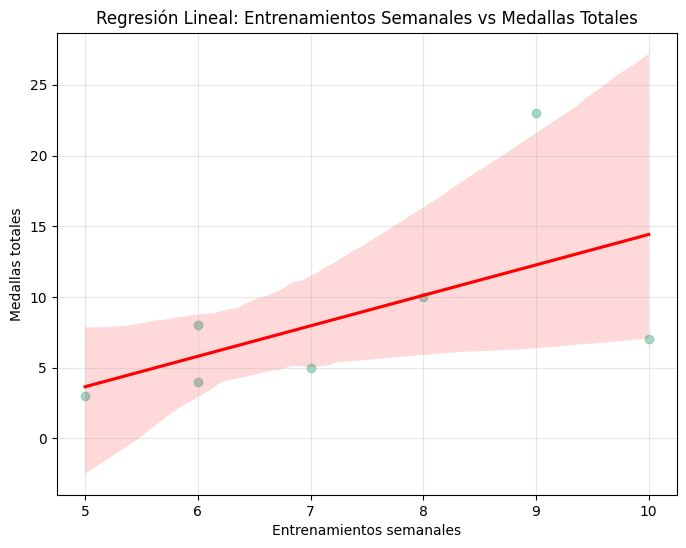

In [9]:
# Variables para regresión lineal
X = df['Entrenamientos_Semanales']
y = df['Medallas_Totales']

# Añadir constante para el intercepto
X_const = sm.add_constant(X)

# Ajustar modelo de regresión lineal
modelo = sm.OLS(y, X_const).fit()

# Coeficientes
intercepto = modelo.params['const']
pendiente = modelo.params['Entrenamientos_Semanales']
print(f"Modelo de regresión: medallas_totales = {intercepto:.3f} + {pendiente:.3f} * entrenamientos_semanales")

# Interpretación
if pendiente > 0:
    print("Interpretación: A mayor número de entrenamientos semanales, tiende a aumentar el número de medallas.")
elif pendiente < 0:
    print("Interpretación: A mayor número de entrenamientos semanales, tiende a disminuir el número de medallas.")
else:
    print("Interpretación: No hay relación lineal entre entrenamientos y medallas.")

# R²
r2 = modelo.rsquared
print(f"Coeficiente de determinación (R²): {r2:.3f}")

# Gráfico de regresión con Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Entrenamientos_Semanales', y='Medallas_Totales', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Regresión Lineal: Entrenamientos Semanales vs Medallas Totales')
plt.xlabel('Entrenamientos semanales')
plt.ylabel('Medallas totales')
plt.grid(True, alpha=0.3)
plt.show()

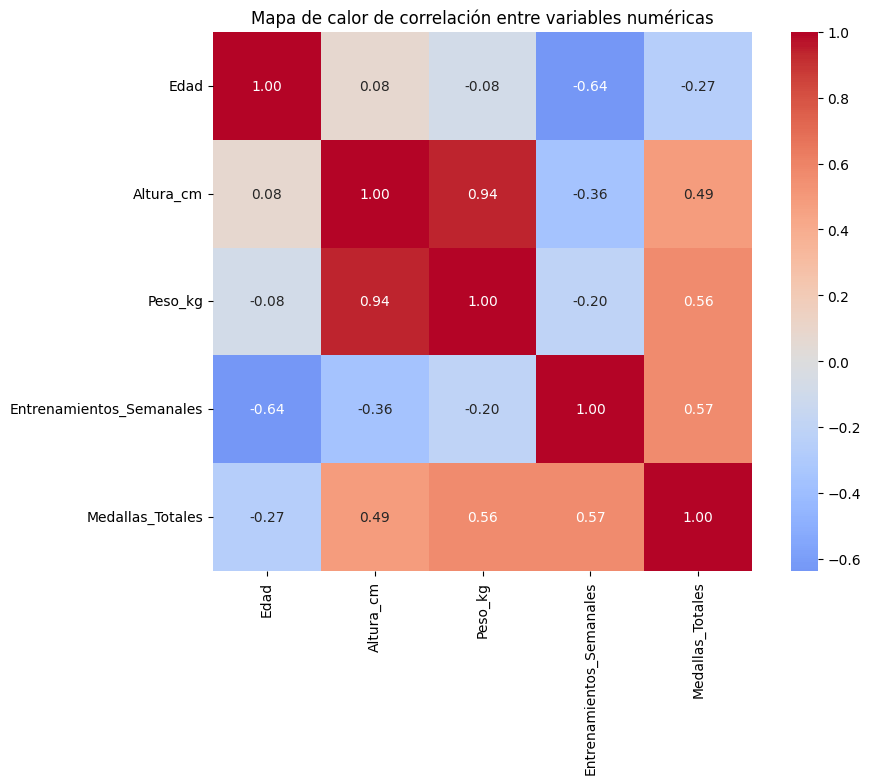

/tmp/ipython-input-517868522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Deporte', y='Medallas_Totales', palette='husl')


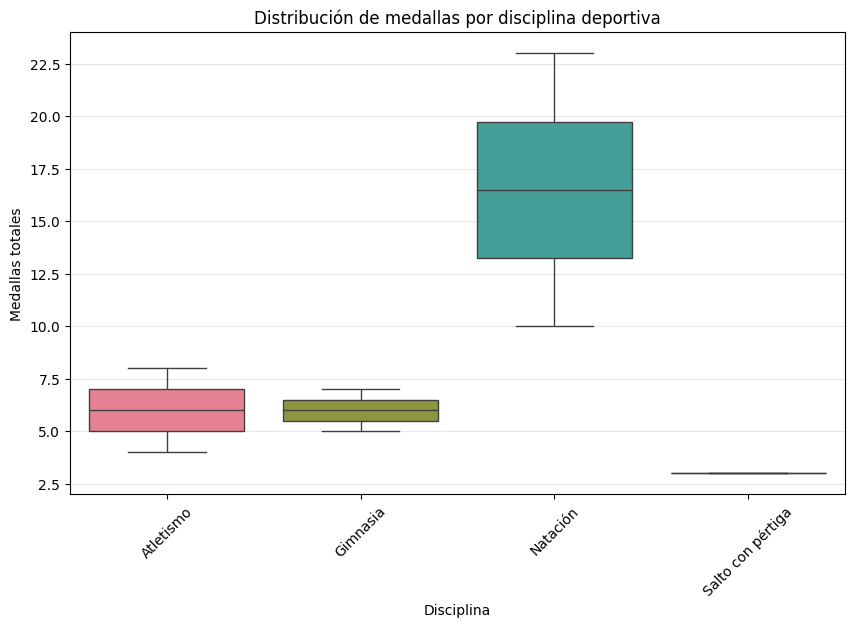

In [11]:
# Heatmap de correlación entre variables numéricas
numericas = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 7))
correlation_matrix = numericas.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Mapa de calor de correlación entre variables numéricas')
plt.show()

# Boxplot de medallas por disciplina
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Deporte', y='Medallas_Totales', palette='husl')
plt.title('Distribución de medallas por disciplina deportiva')
plt.xlabel('Disciplina')
plt.ylabel('Medallas totales')
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.show()